# World Happiness Report 

In [137]:
# loading necessary library 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [138]:
# loading data
data=pd.read_csv("happiness")

In [139]:
# printing the first 5 rows of the dataframe 
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [140]:
# numbers of rows and columns  
data.shape

(158, 12)

In [141]:
# getting information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [142]:
# finding missing value
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [143]:
data.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error'], axis=1, inplace=True)

# Data Analysis

In [144]:
# getting some statistics measures about the data
data.describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Data Visualizating

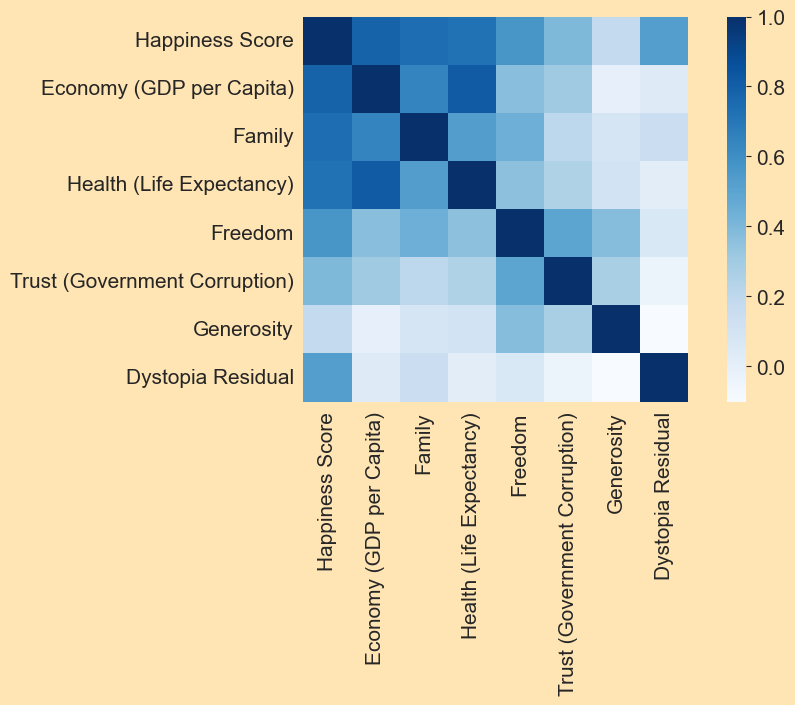

In [145]:
# Create a heatmap
corr = data.corr(method='pearson')
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap='Blues', square=True, ax=ax)
plt.show()

In [146]:
y = data['Happiness Score']
x = data.drop('Happiness Score', axis=1)

In [123]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [124]:
scaler = MinMaxScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)


In [125]:
x

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [127]:
print(x.shape, x_train.shape, x_test.shape)

(158, 7) (126, 7) (32, 7)


Model training

In [128]:
model = LinearRegression()

In [129]:
# training the Linear Regression model with training data 
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

Accuracy score

In [130]:
print(f'Regression R2: {model.score(x_test, y_test)}')

Regression R2: 0.9999999535717998
